### Dataset getter and preparation

In [0]:
# Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1gr9ZKT9fqBUbmIgQI0xeycupvBC77G80' 

In [0]:
fluff, id = link.split('=')

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('aparecido01r.csv')  
# Dataset is now stored in colab

In [0]:
import pandas as pd
import numpy as np

In [6]:
df_parkinsonian = pd.read_csv('aparecido01r.csv')
df_parkinsonian.drop(['VarName42'],inplace=True,axis=1)
df_parkinsonian.head()

,Time,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB
0,0.00,-48.241398,-2.616922,54.711223,5.897612,-5.668727,15.358206,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.277653,-0.400458,-0.739940,-0.337835,-0.119570,-0.858228,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.204501,-0.049042,-0.039948,0.163058,-0.145113,0.023957,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,4.648508,0.626230,0.825013,2.475038
1,0.02,1.960784,-1.152056,29.549096,19.569696,-0.556954,5.531395,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.362860,-0.766430,-0.891798,-0.431464,-0.220279,-0.898146,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.206394,-0.051423,-0.039338,0.163546,-0.148287,0.016388,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.563287,2.904097,0.825013,2.475038
2,0.04,44.670787,6.050202,-12.092775,18.165866,4.280156,-5.867094,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.368475,-0.887892,-0.764965,-0.391669,-0.305608,-0.838209,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.208469,-0.052277,-0.037263,0.163119,-0.148836,0.031220,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.317922,2.830854,0.825013,2.475038
3,0.06,70.168612,-4.188602,-58.556497,17.494469,5.943389,-14.839399,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.275578,-0.982010,-0.538766,-0.362371,-0.398016,-0.842603,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.206088,-0.050629,-0.036835,0.163912,-0.148653,0.036103,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.208057,2.795453,0.825013,2.475038
4,0.08,70.214389,-33.928435,-71.725032,15.800717,4.554818,-21.248188,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.185489,-0.879713,-0.390692,-0.323674,-0.414496,-0.758495,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.204074,-0.048554,-0.036896,0.160006,-0.148959,0.038361,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.150683,2.778363,0.825013,2.475038


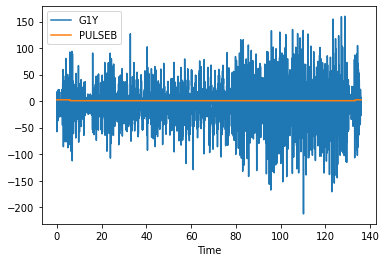

In [7]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','PULSEB'])

In [8]:
df_parkinsonian.loc[df_parkinsonian['PULSEB']<2]

,Time,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB
296,5.92,-86.648356,32.845045,44.090944,14.961471,-0.785840,20.241093,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.128237,-0.427070,-0.390326,-0.257145,-0.202701,-0.805005,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198215,-0.045075,-0.037995,0.162020,-0.146456,0.030915,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.085985,2.761273,0.825013,0.825013
297,5.94,-103.173877,-12.520027,55.748836,-6.355383,-5.409323,18.272679,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.116884,-0.419135,-0.318547,-0.293278,-0.282048,-0.826368,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198215,-0.045075,-0.037995,0.160311,-0.148165,0.027924,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.082322,2.756390,0.825013,0.825013
298,5.96,-16.990921,-59.273671,47.737850,0.083925,-3.334096,19.462882,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.285100,-0.539010,-0.522286,-0.373846,-0.181460,-0.820874,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.199496,-0.047761,-0.037507,0.160616,-0.147982,0.023774,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.081102,2.756390,0.825013,0.825013
299,5.98,35.790036,-79.156176,18.425269,17.143511,4.615854,3.425650,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.401312,-1.021561,-0.665232,-0.467842,-0.353460,-0.869703,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.205234,-0.048615,-0.041535,0.161288,-0.148409,0.012848,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.081102,2.756390,0.825013,0.825013
300,6.00,56.450752,-42.076753,-28.908217,14.747845,2.906844,-9.071489,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.554635,-1.175128,-0.819043,-0.417426,-0.294987,-0.728222,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.206882,-0.049653,-0.045197,0.161410,-0.149935,0.019806,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.083543,2.760052,0.825013,0.825013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,133.20,-53.841459,-54.055085,34.599832,-15.449760,-0.190738,-2.220188,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.160708,-0.372747,-0.395453,-0.284611,-0.341375,-0.717601,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.192416,-0.054841,-0.041474,0.162448,-0.145296,0.029206,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.107958,2.782025,0.825013,0.825013
6661,133.22,-49.599451,-70.428016,41.710536,-15.800717,-5.119402,0.160220,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.245914,-0.420233,-0.682200,-0.284855,-0.329656,-0.794507,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.192477,-0.057465,-0.047028,0.161105,-0.143282,0.045563,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.094530,2.760052,0.825013,0.825013
6662,133.24,-22.743572,-41.588464,16.044862,-10.658427,-1.960784,4.203861,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.400702,-0.572824,-1.140093,-0.291814,-0.133486,-0.968704,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.193210,-0.056428,-0.051545,0.164462,-0.143404,0.036530,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.094530,2.763714,0.825013,0.825013
6663,133.26,31.212329,22.224765,-14.778363,5.638209,-1.777676,2.540627,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.428046,-0.570748,-1.435874,-0.313542,-0.204654,-0.900465,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.193454,-0.057954,-0.051362,0.159579,-0.140841,0.043915,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.089647,2.758831,0.825013,0.825013


In [0]:
df_p_2 = df_parkinsonian.loc[df_parkinsonian['PULSEB']<2]

In [10]:
f = len(df_p_2)/50 # size/frequency in Hz to get the time
l = np.arange(0,f,(1/50)) #set a vector to be the counter of time starting in zero
len(l) #size of the vector
# precisão de duas casas

6369

In [11]:
type(l)
l.tolist()
df_p_2.drop('Time',inplace=True,axis=1)
df_p_2['Time']=l.tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
df_parkinsonian= df_p_2

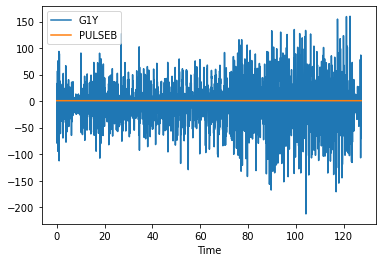

In [13]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','PULSEB'])

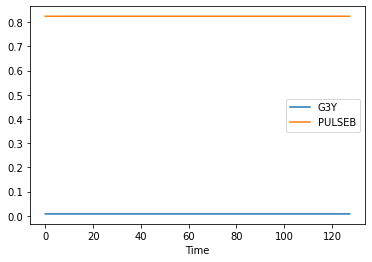

In [14]:
df_parkinsonian.plot(kind='line',x='Time',y=['G3Y','PULSEB'])

### Plotting important axis
- G1 refere-se ao giroscópio fixado no dorso da mão

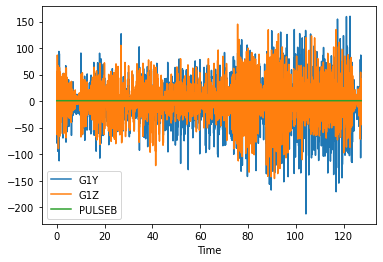

In [15]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','G1Z','PULSEB'])

### Audio getter

In [0]:
audio_link = 'https://drive.google.com/open?id=1REW8Bn01cVniE8TQx3aZTeyfoUHqRUII'
fluff, id = audio_link.split('=')
downloaded = drive.CreateFile({'id':id}) 

In [0]:
downloaded.GetContentFile('experiment beeps_between_act.wav')

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

### Audio processing

In [0]:
spf = wave.open("experiment beeps_between_act.wav", "r")

In [20]:
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")
fs = spf.getframerate()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [0]:
# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

In [22]:
fs

22050

In [0]:
Time = np.linspace(0, len(signal) / fs, num=len(signal))

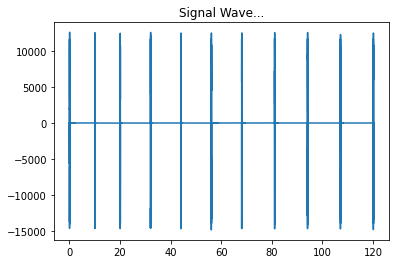

In [24]:
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

In [0]:
audio_signal = []
value=32.00
for i in np.arange(0,f,(1/50)):
    if i==10.00:
        audio_signal.append(50)
    elif i==20.00:
        audio_signal.append(50)
    elif (i==value):
        audio_signal.append(50)
        value+=12
    else:
        audio_signal.append(0)

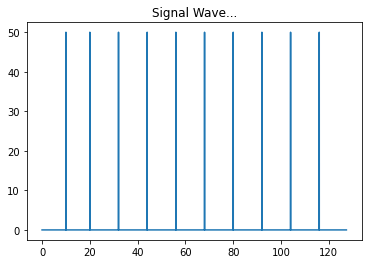

In [26]:
plt.figure(1)
plt.title("Signal Wave...")
plt.plot(l, audio_signal)
plt.show()

In [27]:
len(audio_signal)

6369

In [28]:
df_parkinsonian.shape

(6369, 41)

In [0]:
df_parkinsonian['audio_signal']=audio_signal

In [30]:
df_parkinsonian.head()

,G1X,G1Y,G1Z,G2X,G2Y,G2Z,G3X,G3Y,G3Z,G4X,G4Y,G4Z,A1X,A1Y,A1Z,A2X,A2Y,A2Z,A3X,A3Y,A3Z,A4X,A4Y,A4Z,M1X,M1Y,M1Z,M2X,M2Y,M2Z,M3X,M3Y,M3Z,M4X,M4Y,M4Z,EMG1,EMG2,PULSEA,PULSEB,Time,audio_signal
296,-86.648356,32.845045,44.090944,14.961471,-0.785840,20.241093,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.128237,-0.427070,-0.390326,-0.257145,-0.202701,-0.805005,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198215,-0.045075,-0.037995,0.162020,-0.146456,0.030915,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.085985,2.761273,0.825013,0.825013,0.00,0
297,-103.173877,-12.520027,55.748836,-6.355383,-5.409323,18.272679,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.116884,-0.419135,-0.318547,-0.293278,-0.282048,-0.826368,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.198215,-0.045075,-0.037995,0.160311,-0.148165,0.027924,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.082322,2.756390,0.825013,0.825013,0.02,0
298,-16.990921,-59.273671,47.737850,0.083925,-3.334096,19.462882,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.285100,-0.539010,-0.522286,-0.373846,-0.181460,-0.820874,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.199496,-0.047761,-0.037507,0.160616,-0.147982,0.023774,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.081102,2.756390,0.825013,0.825013,0.04,0
299,35.790036,-79.156176,18.425269,17.143511,4.615854,3.425650,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.401312,-1.021561,-0.665232,-0.467842,-0.353460,-0.869703,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.205234,-0.048615,-0.041535,0.161288,-0.148409,0.012848,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.081102,2.756390,0.825013,0.825013,0.06,0
300,56.450752,-42.076753,-28.908217,14.747845,2.906844,-9.071489,0.00763,0.00763,0.00763,0.00763,0.00763,0.00763,-0.554635,-1.175128,-0.819043,-0.417426,-0.294987,-0.728222,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.206882,-0.049653,-0.045197,0.161410,-0.149935,0.019806,0.000031,0.000031,0.000031,0.000031,0.000031,0.000031,3.083543,2.760052,0.825013,0.825013,0.08,0


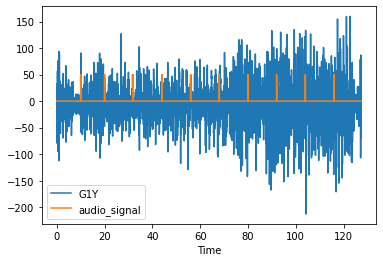

In [31]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','audio_signal'])

# Final Result of Data Preparation
Final dataset plotting with slices of activities made by the subjects according to the article [HAND MOTION QUANTIFICATION USING NON-CONTACT CAPACITIVE SENSORS](https://www.researchgate.net/publication/314086406_HAND_MOTION_QUANTIFICATION_USING_NON-CONTACT_CAPACITIVE_SENSORS) 

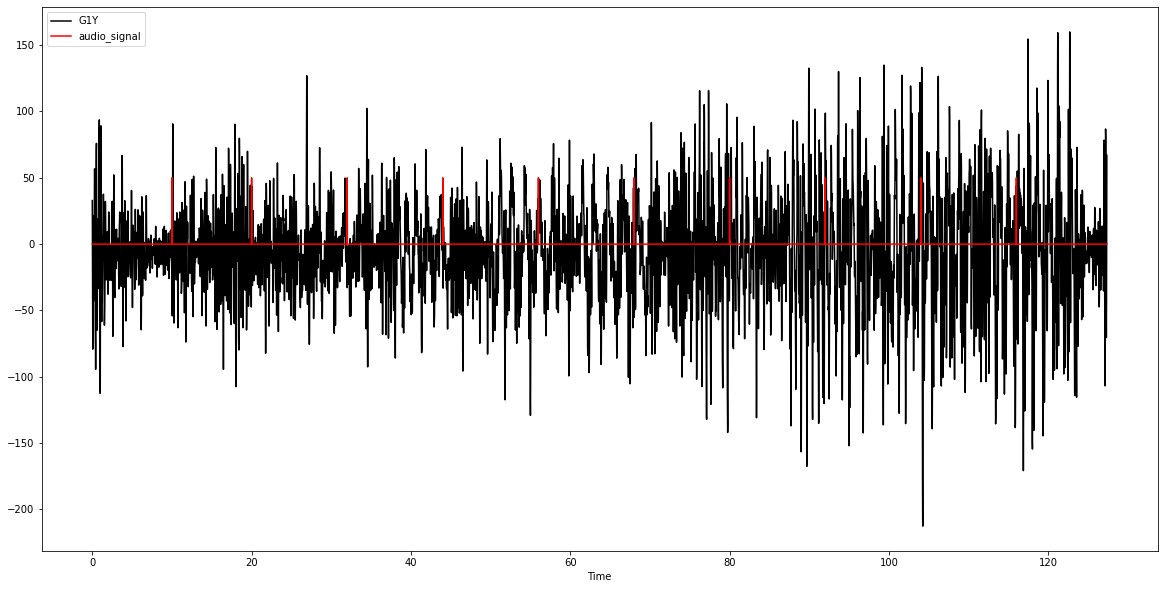

In [32]:
df_parkinsonian.plot(kind='line',x='Time',y=['G1Y','audio_signal'],figsize=(20,10),color=['k','r'])